In [27]:
!pip install yfinance

In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
from bs4 import BeautifulSoup

Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [29]:
tesla = yf.Ticker("TSLA")


tesla_share_price_data = tesla.history(period="max")
tesla_share_price_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [30]:
# Make the request with headers
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}
response = requests.get(url, headers=headers)
html_data = response.text

# Parse with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Look for the revenue table by class name
tables = soup.find_all("table", class_="historical_data_table")
revenue_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        revenue_table = table
        break

# Extract the data
tesla_revenue = []
for row in revenue_table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            tesla_revenue.append({"Date": date, "Revenue": revenue})

# Create DataFrame
tesla_revenue_df = pd.DataFrame(tesla_revenue)

# Preview
print(tesla_revenue_df.head())


         Date Revenue
0  2024-12-31   25707
1  2024-09-30   25182
2  2024-06-30   25500
3  2024-03-31   21301
4  2023-12-31   25167


Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [31]:
gamestop = yf.Ticker("GME")
gamestop_share_price_data = gamestop.history(period="max")
gamestop_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [32]:
# Make the request with headers
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}
response = requests.get(url, headers=headers)
html_data = response.text

# Parse with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Find the correct table
tables = soup.find_all("table", class_="historical_data_table")
revenue_table = None
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        revenue_table = table
        break

# Extract the data
gamestop_revenue = []
for row in revenue_table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            gamestop_revenue.append({"Date": date, "Revenue": revenue})

# Create DataFrame
gamestop_revenue_df = pd.DataFrame(gamestop_revenue)

# Preview
print(gamestop_revenue_df.head())

         Date Revenue
0  2025-01-31    1283
1  2024-10-31     860
2  2024-07-31     798
3  2024-04-30     882
4  2024-01-31    1794


Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

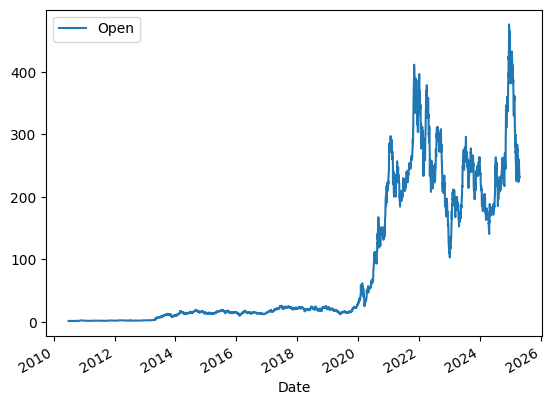

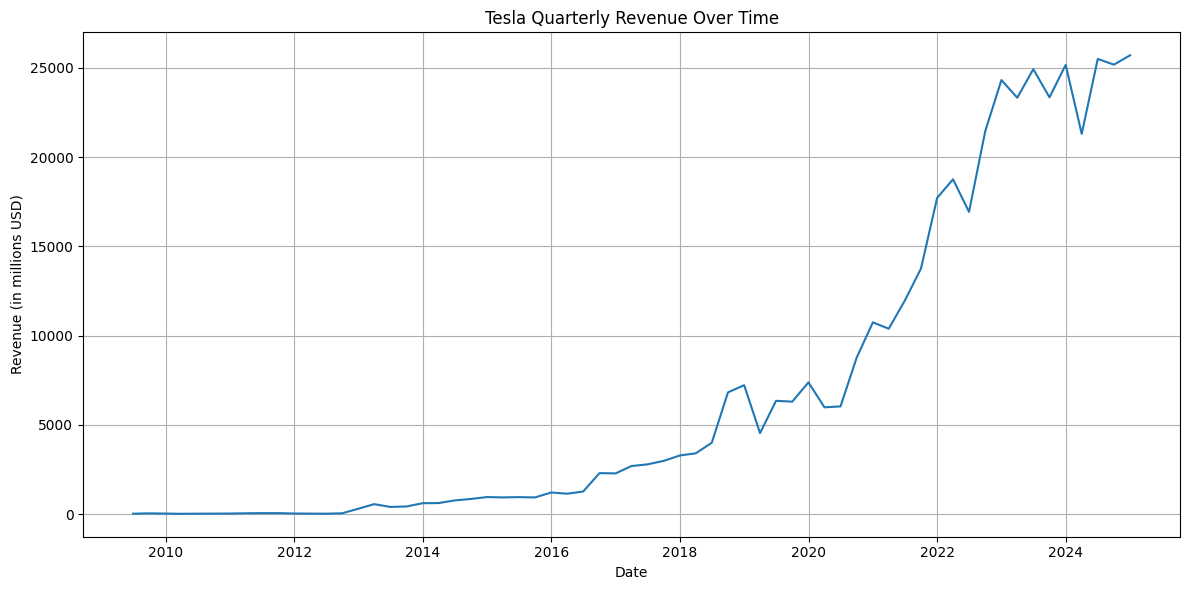

In [33]:
tesla_share_price_data.reset_index(inplace=True)
tesla_share_price_data.plot(x="Date", y="Open")

# Convert Revenue to numeric
tesla_revenue_df["Revenue"] = pd.to_numeric(tesla_revenue_df["Revenue"])

# Convert Date to datetime
tesla_revenue_df["Date"] = pd.to_datetime(tesla_revenue_df["Date"])

# Sort by date just in case
tesla_revenue_df.sort_values("Date", inplace=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(tesla_revenue_df["Date"], tesla_revenue_df["Revenue"])
plt.title("Tesla Quarterly Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (in millions USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

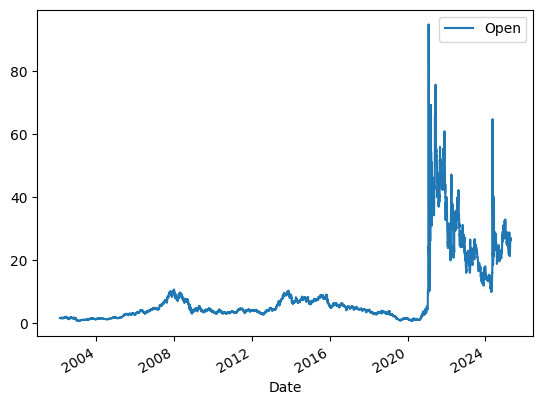

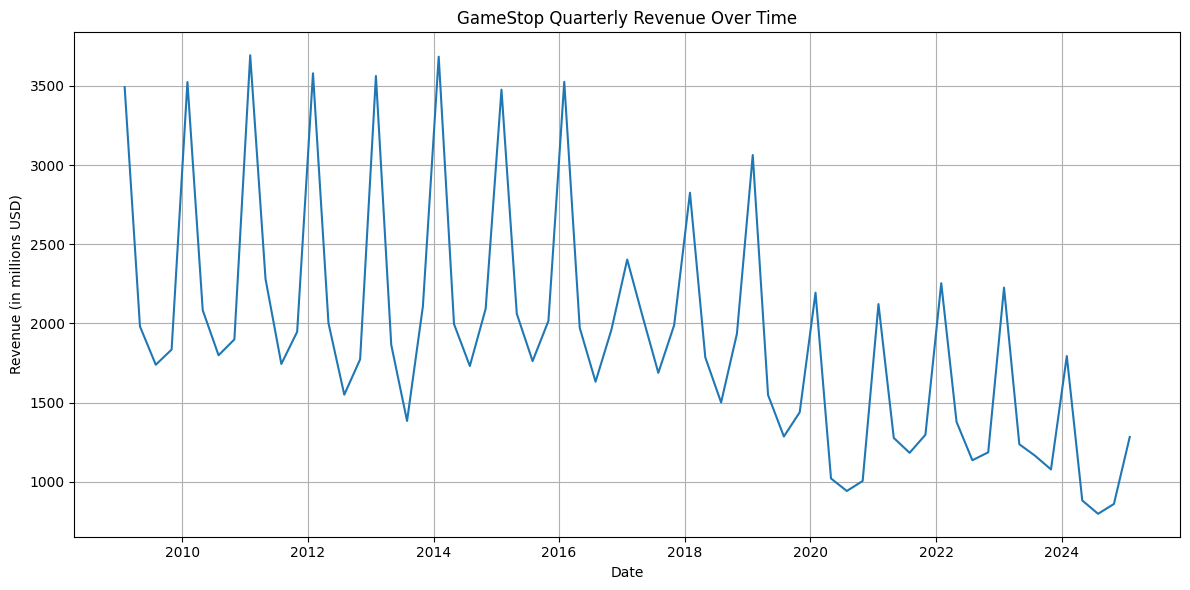

In [34]:
gamestop_share_price_data.reset_index(inplace=True)
gamestop_share_price_data.plot(x="Date", y="Open")

# Convert Revenue to numeric
gamestop_revenue_df["Revenue"] = pd.to_numeric(gamestop_revenue_df["Revenue"])

# Convert Date to datetime
gamestop_revenue_df["Date"] = pd.to_datetime(gamestop_revenue_df["Date"])

# Sort by date
gamestop_revenue_df.sort_values("Date", inplace=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(gamestop_revenue_df["Date"], gamestop_revenue_df["Revenue"])
plt.title("GameStop Quarterly Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (in millions USD)")
plt.grid(True)
plt.tight_layout()
plt.show()